In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.interpolate import interp1d

In [34]:
s = 'aba'
# s = 'bbb'

In [56]:

def posterior(s):
    npoints = 10000
    pa = np.linspace(0,1,npoints)
    prior = np.ones(npoints)
    na = s.count('a')
    nb = s.count('b')
    likelihood = pa**na * (1-pa)**nb
    post = prior*likelihood
    mostLikely = pa[post == max(post)]
    #integrate to normalize function
    post /= integrate.simps(post,pa)

    Epa = integrate.simps(post*pa,pa)

    print(Epa)

    sigma = (integrate.simps(pa**2*post,pa)-Epa**2)**0.5
    pdf = interp1d(pa, post, kind='cubic')

    plt.plot(pa,post,label = "Posterior")
    plt.scatter(mostLikely,pdf(mostLikely),label = 'max(P(Pa))')
    plt.scatter(Epa,pdf(Epa),label = 'E[Pa]')
    title = '+prob = ' + '{:.4f}'.format(mostLikely[0]) + " E[Pa] = " + '{:.4f}'.format(Epa)+ " sigma = " + str('{:.4f}'.format(sigma))
    plt.title(title)
    plt.legend()
    plt.xlabel("Pa")
    plt.ylabel("P(Pa|s)")
    plt.savefig('posterior.pdf')
    
    

0.1999999999987998


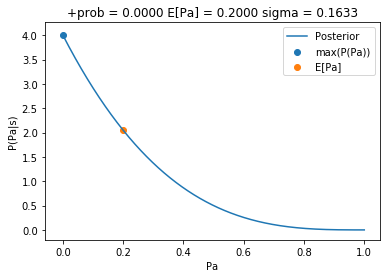

In [58]:
posterior('bbb')